### **Source : https://realpython.com/k-means-clustering-python/**

In [56]:
!pip install kneed

In [57]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [58]:
features, true_labels = make_blobs(     
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

make_blobs() returns a tuple of two values:

    A two-dimensional NumPy array with the x- and y-values for each of the samples
    A one-dimensional NumPy array containing the cluster labels for each sample
n_samples is the total number of samples to generate.

centers is the number of centers to generate.

cluster_std is the standard deviation

Nondeterministic machine learning algorithms like k-means are difficult to reproduce. The random_state parameter is set to an integer value so you can follow the data presented in the tutorial. In practice, it’s best to leave random_state as the default value, None.

In [59]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [60]:
true_labels[:5]

array([1, 0, 2, 2, 2])

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm. 

In [61]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [62]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

Here are the parameters used in this example:

*init* controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

*n_clusters* sets k for the clustering step. This is the most important parameter for k-means.

*n_init* sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

*max_iter* sets the number of maximum iterations for each initialization of the k-means algorithm.


In [63]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [64]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [65]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [66]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [67]:
# The number of iterations required to converge
kmeans.n_iter_

6

In [68]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

In [69]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

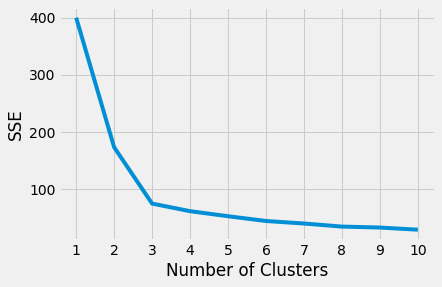

In [70]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [71]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [72]:
kl.elbow

3

In [73]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

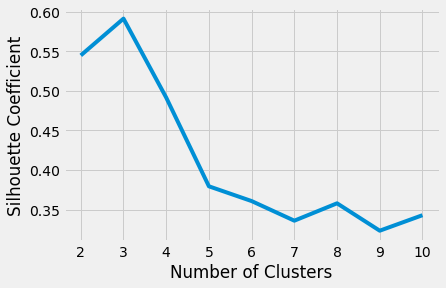

In [74]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

###Evaluating Clustering Performance Using Advanced Techniques



In [75]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [76]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(features)

In [77]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_features, dbscan.labels_
).round (2)

In [78]:
kmeans_silhouette

0.5

In [79]:
dbscan_silhouette

0.38

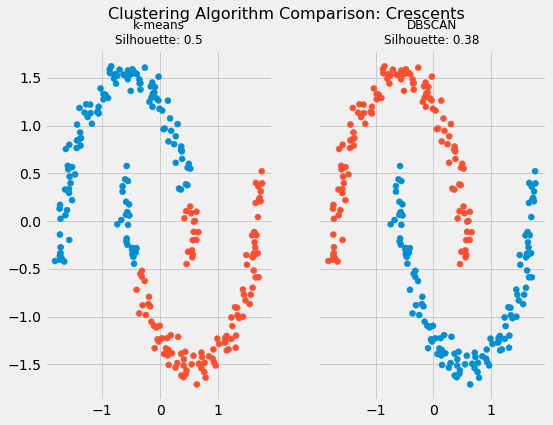

In [80]:
#Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

In [81]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [82]:
round(ari_kmeans, 2)

0.47

In [83]:
round(ari_dbscan, 2)

1.0

#**How to Build a K-Means Clustering Pipeline in Python**

In [84]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [85]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# Download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

In [86]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=range(1, 20532),
    skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype="str"
)

In [87]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [88]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

The labels are strings containing abbreviations of cancer types:

    BRCA: Breast invasive carcinoma
    COAD: Colon adenocarcinoma
    KIRC: Kidney renal clear cell carcinoma
    LUAD: Lung adenocarcinoma
    PRAD: Prostate adenocarcinoma


In [89]:
label_encoder = LabelEncoder()

In [90]:
true_labels = label_encoder.fit_transform(true_label_names)

In [91]:
true_labels[:5]

array([4, 3, 4, 4, 0])

In [92]:
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [93]:
n_clusters = len(label_encoder.classes_)

In [94]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

Now that you’ve built a pipeline to process the data, you’ll build a separate pipeline to perform k-means clustering. You’ll override the following default arguments of the KMeans class:

    init: You’ll use "k-means++" instead of "random" to ensure centroids are initialized with some distance between them. In most cases, this will be an improvement over "random".

    n_init: You’ll increase the number of initializations to ensure you find a stable solution.

    max_iter: You’ll increase the number of iterations per initialization to ensure that k-means will converge.

Build the k-means clustering pipeline with user-defined arguments in the KMeans constructor:

In [95]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [96]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [97]:
pipe.fit(data)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1))),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=2, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=500,
                                         n_clusters=5, n_init=50, n_jobs=None,
                                         precomp

In [98]:
preprocessed_data = pipe["preprocessor"].transform(data)

In [99]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [100]:
silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450308

In [101]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

In [102]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


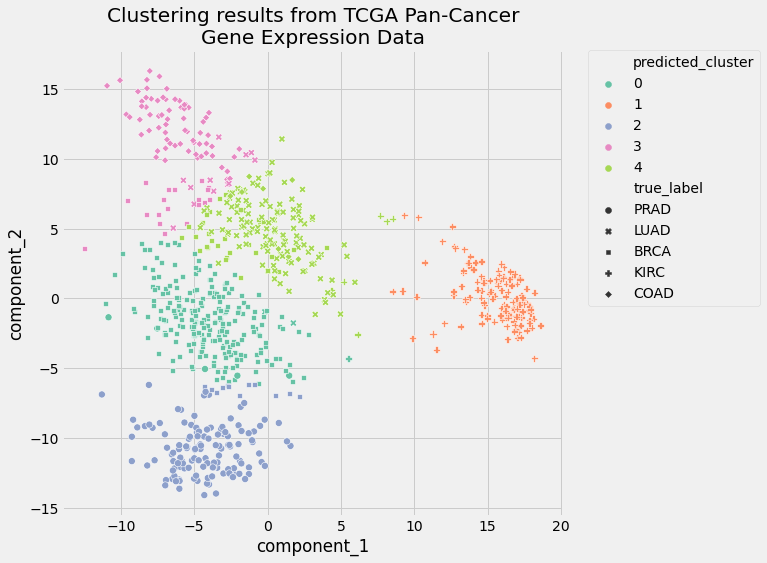

In [103]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

##Tuning a K-Means Clustering Pipeline

In [104]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

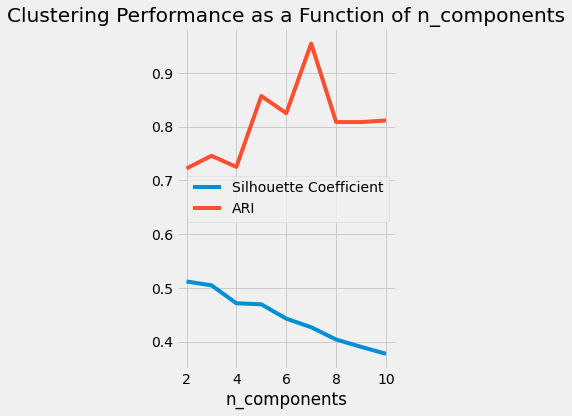

In [105]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

There are two takeaways from this figure:


1.   The silhouette coefficient decreases linearly. The silhouette coefficient depends on the distance between points, so as the number of dimensions increases, the sparsity increases.
2.  The ARI improves significantly as you add components. It appears to start tapering off after n_components=7, so that would be the value to use for presenting the best clustering results from this pipeline.

Like most machine learning decisions, you must balance optimizing clustering evaluation metrics with the goal of the clustering task. In situations when cluster labels are available, as is the case with the cancer dataset used in this tutorial, ARI is a reasonable choice. ARI quantifies how accurately your pipeline was able to reassign the cluster labels.

The silhouette coefficient, on the other hand, is a good choice for exploratory clustering because it helps to identify subclusters. These subclusters warrant additional investigation, which can lead to new and important insights.